## 1.0. Импорт библиотек

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import scale
from sklearn.cluster import AgglomerativeClustering, KMeans
from scipy.cluster import hierarchy
%matplotlib inline
features = ['X1', 'X2', 'X18', 'X22','X28', 'X37', 'X46', 'X48'] 
f_len = len(features)

In [2]:
features = ['X1', 'X2', 'X3', 'X4', 'X5', 'X6', 'X7', 'X8', 'X9', 'X10'] 
f_len = len(features)

## 1.1. Импорт данных

In [3]:
data = pd.read_excel('Dannye (1).xlsx', index_col='Субъект Российской Федерации', sheet_name = 'Лист2')
data.head()

,X1,X2,X3,X4,X5,X6,X7,X8,X9,X10
Субъект Российской Федерации,,,,,,,,,,
Алтайский край,14.0,23937,24.7,60.7,-18.0,1.38,0.42,20.28,1.25,169
Амурская область,14.0,33304,25.6,64.1,0.2,2.50,0.51,18.33,3.81,124
Архангельская область,13.0,35693,28.4,60.0,-26.0,0.76,0.78,18.47,6.29,204
Астраханская область,11.3,24971,24.5,62.2,-78.0,1.33,0.84,14.68,4.20,104
Белгородская область,13.3,32352,32.1,67.3,60.0,0.69,0.47,21.41,5.85,157


## 1.2. Стандартизация данных

In [4]:
index = data.index
columns = data.columns
scaled = (data - data.mean(axis=0))/data.std()
scaled_data = pd.DataFrame(scaled, columns=columns, index=index) 
scaled_data.head()

,X1,X2,X3,X4,X5,X6,X7,X8,X9,X10
Субъект Российской Федерации,,,,,,,,,,
Алтайский край,0.598260,-0.593885,-0.446512,-0.497539,-0.468984,0.188463,-1.246125,-0.207092,-0.652647,-0.138244
Амурская область,0.598260,0.070693,-0.214143,0.162648,-0.130889,2.272277,-0.781334,-0.450086,-0.269100,-0.243980
Архангельская область,0.243395,0.240190,0.508780,-0.633460,-0.617597,-0.965077,0.613038,-0.432640,0.102461,-0.056005
Астраханская область,-0.359874,-0.520524,-0.498149,-0.206280,-1.583583,0.095435,0.922898,-0.904922,-0.210669,-0.290974
Белгородская область,0.349855,0.003150,1.464072,0.784000,0.979995,-1.095316,-0.987908,-0.066279,0.036539,-0.166440


## 1.3. Построение дендрограмм

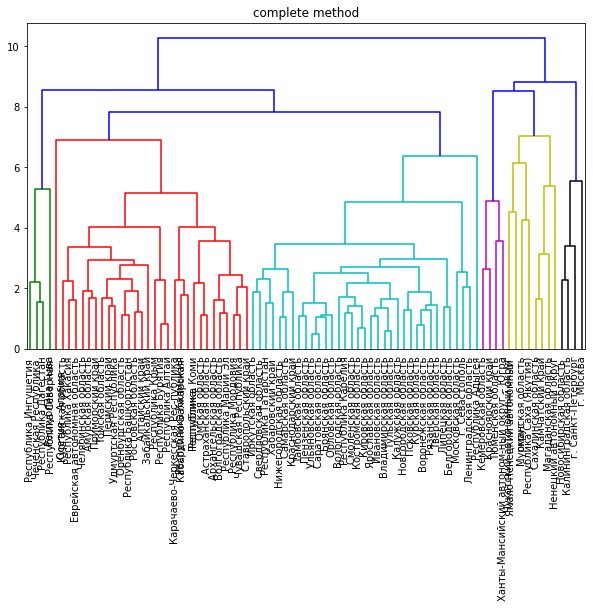

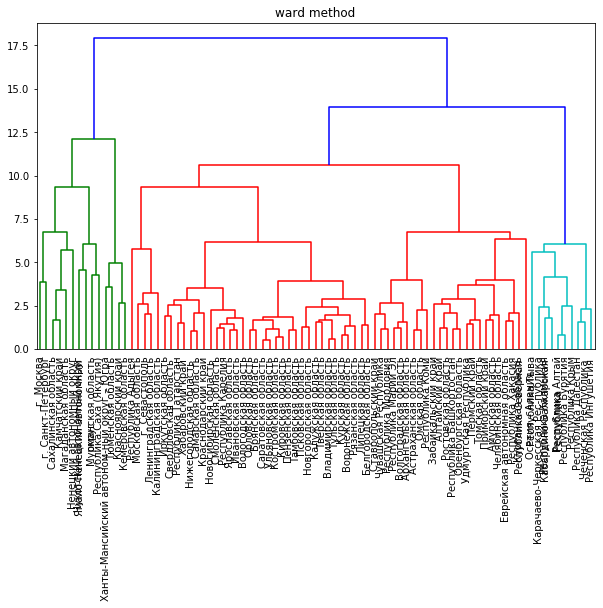

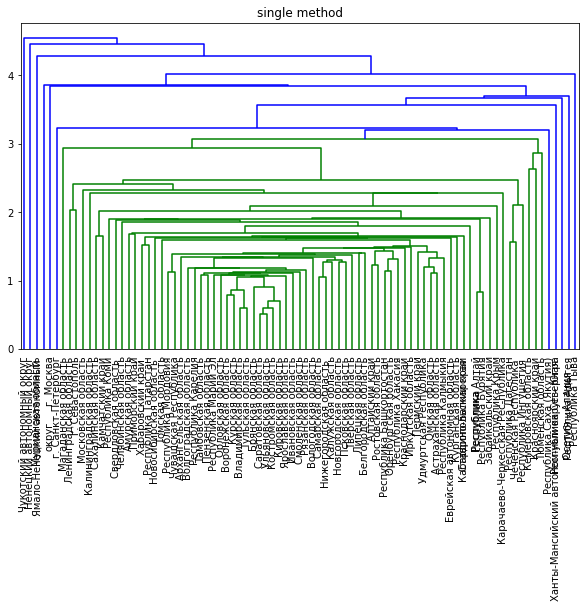

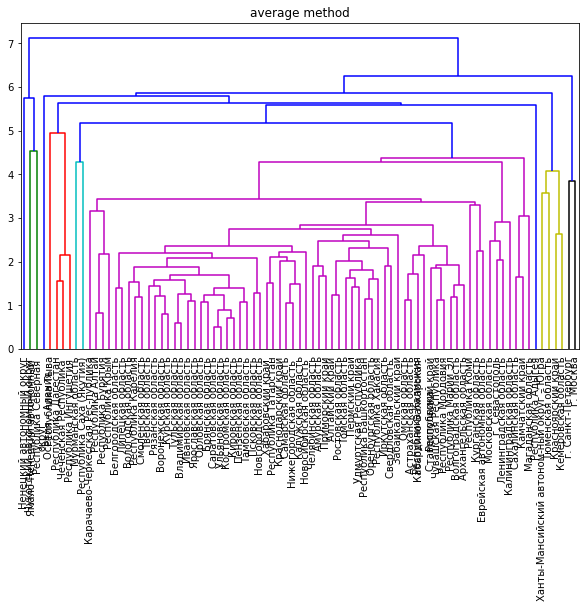

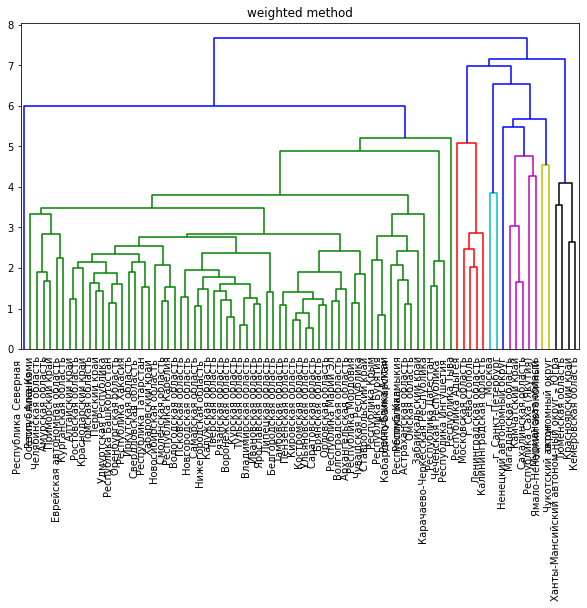

In [5]:
methods = ['complete', 'ward', 'single', 'average', 'weighted']
for method in methods:
    Z = hierarchy.linkage(scaled_data, method=method, optimal_ordering=True)
    #строим дендрограмму

    plt.figure(figsize=(10,6)) # задаем размеры окна с графиками

    hierarchy.dendrogram(Z, labels=scaled_data.index, leaf_font_size=10)

# Z - результат кластеризации, labels - названия строк (ось Х), leaf_font_size - размер шрифта

    plt.title('{} method'.format(method))
   

## Опционально. Удаление выбросов.

In [9]:
#Проверка с помощью k-means

In [10]:
n_clusters = 7

kmeans = KMeans(n_clusters = n_clusters, random_state=36) 
kmeans.fit(scaled_data); 
scaled_data['kmeans'] = kmeans.labels_
cluster_dict={}
for i in range(n_clusters):
    clust_list = scaled_data[scaled_data['kmeans']==i][features].index.values 
    print('Состав кластера {}: {}'.format(i, clust_list))


Состав кластера 0: ['Белгородская область' 'г. Севастополь' 'Калининградская область'
 'Краснодарский край' 'Ленинградская область' 'Московская область'
 'Новосибирская область ' 'Республика Адыгея' 'Республика Саха (Якутия)'
 'Республика Татарстан' 'Самарская область' 'Свердловская область ']
Состав кластера 1: ['Кабардино-Балкарская \nРеспублика' 'Карачаево-Черкесская Рес-публика'
 'Республика Алтай' 'Республика Бурятия' 'Республика Дагестан'
 'Республика Ингушетия ' 'Республика Крым' 'Республика Тыва'
 'Чеченская Республика ']
Состав кластера 2: ['Мурманская область' 'Чукотский автономный округ'
 'Ямало-Ненецкий автономный \nокруг']
Состав кластера 3: ['Алтайский край' 'Архангельская область' 'Брянская область'
 'Владимирская область' 'Волгоградская область' 'Вологодская область'
 'Воронежская область' 'Ивановская область' 'Иркутская область'
 'Калужская область' 'Кировская область' 'Костромская область'
 'Курская область' 'Липецкая область' 'Нижегородская область '
 'Новгородская о

In [8]:
#Избавление от выбросов (опционально)

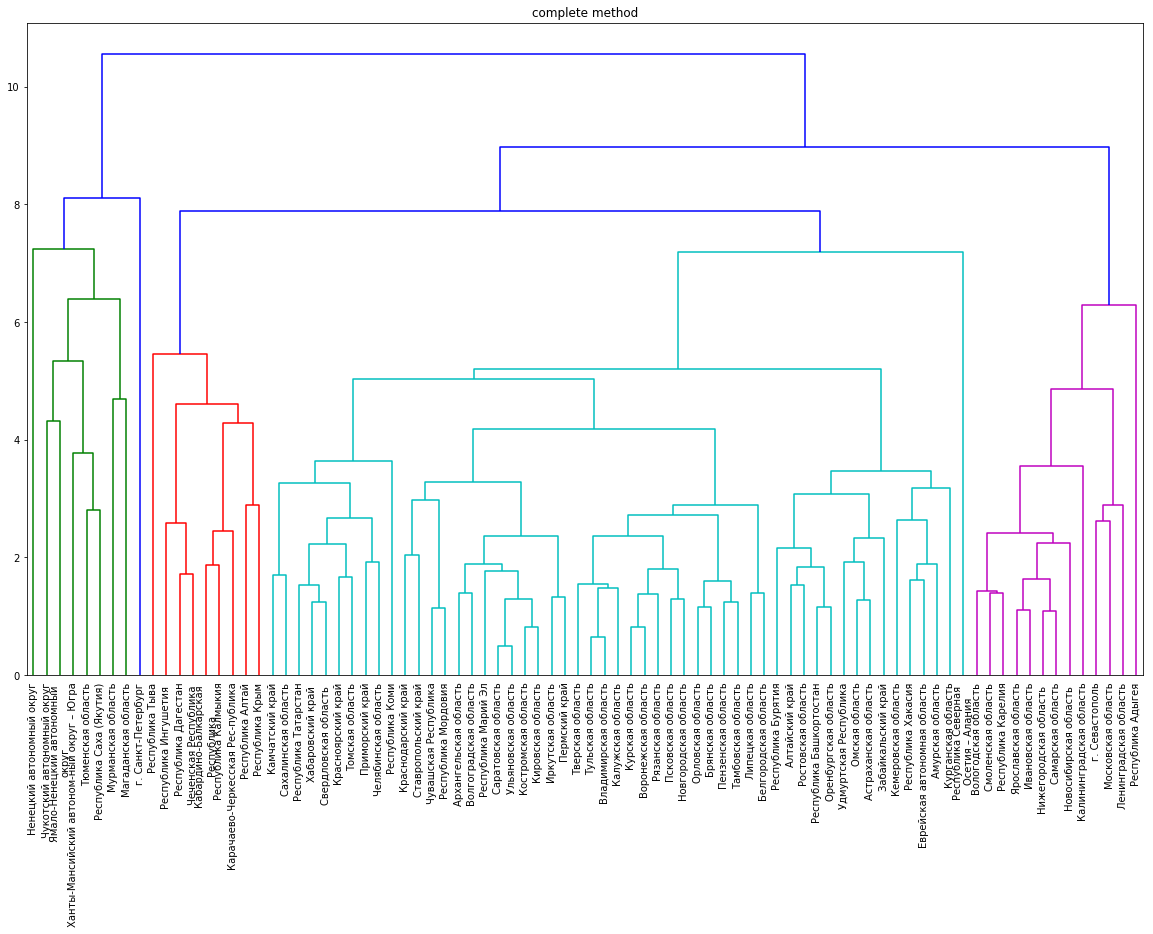

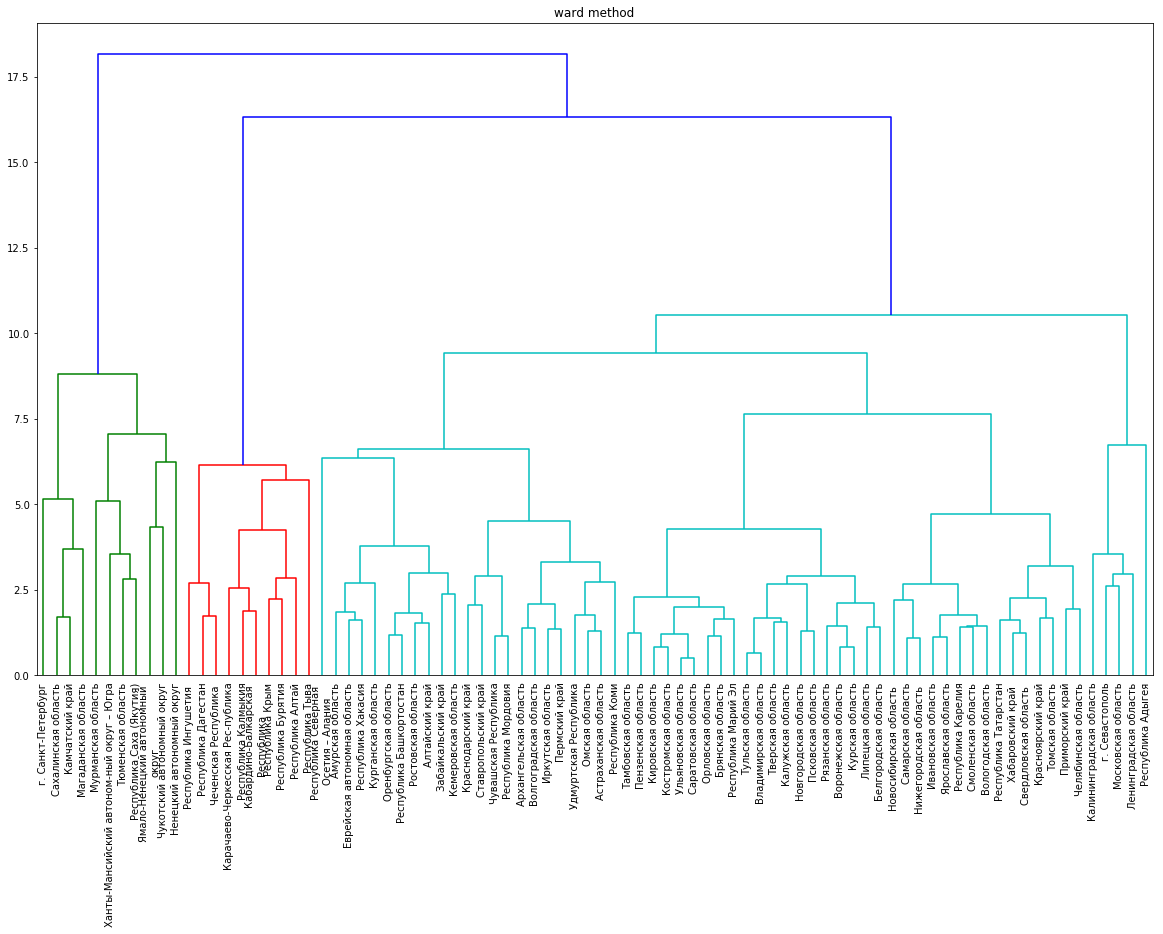

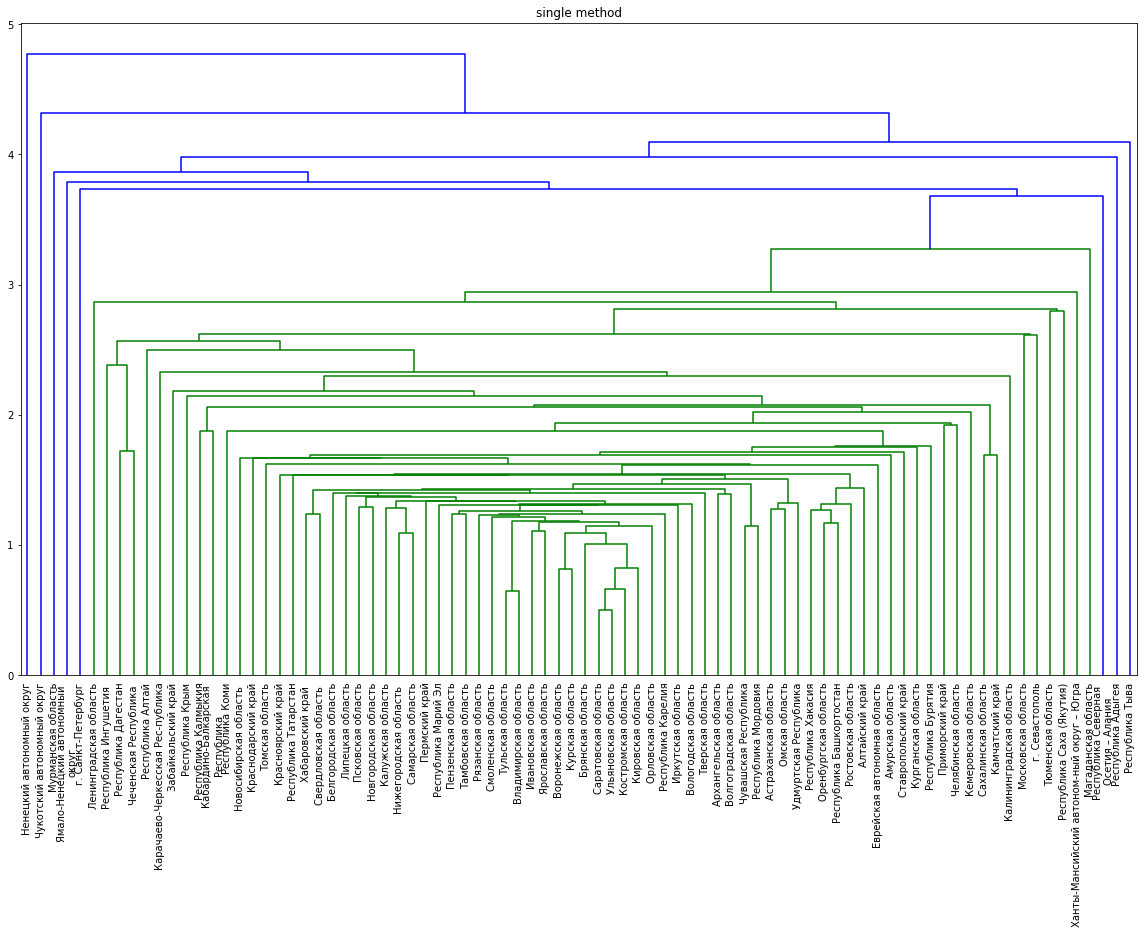

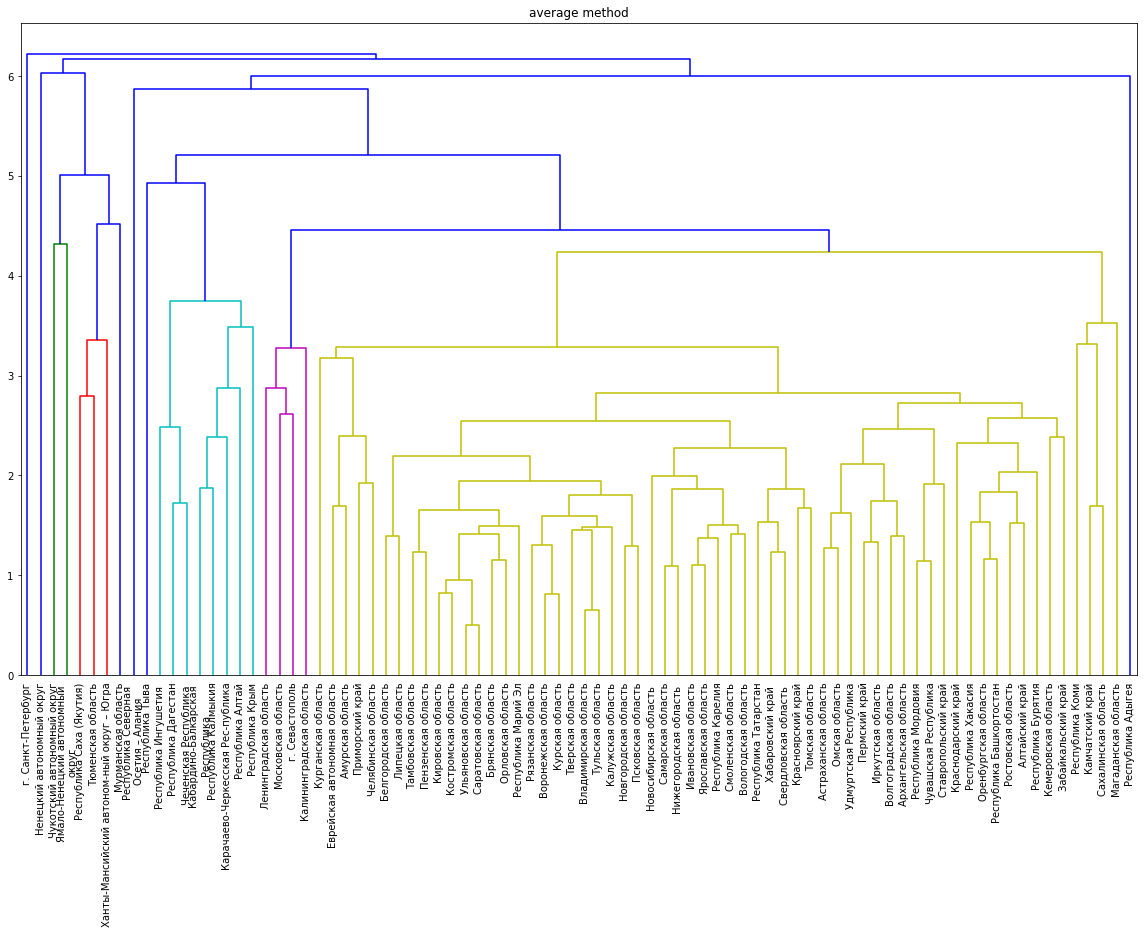

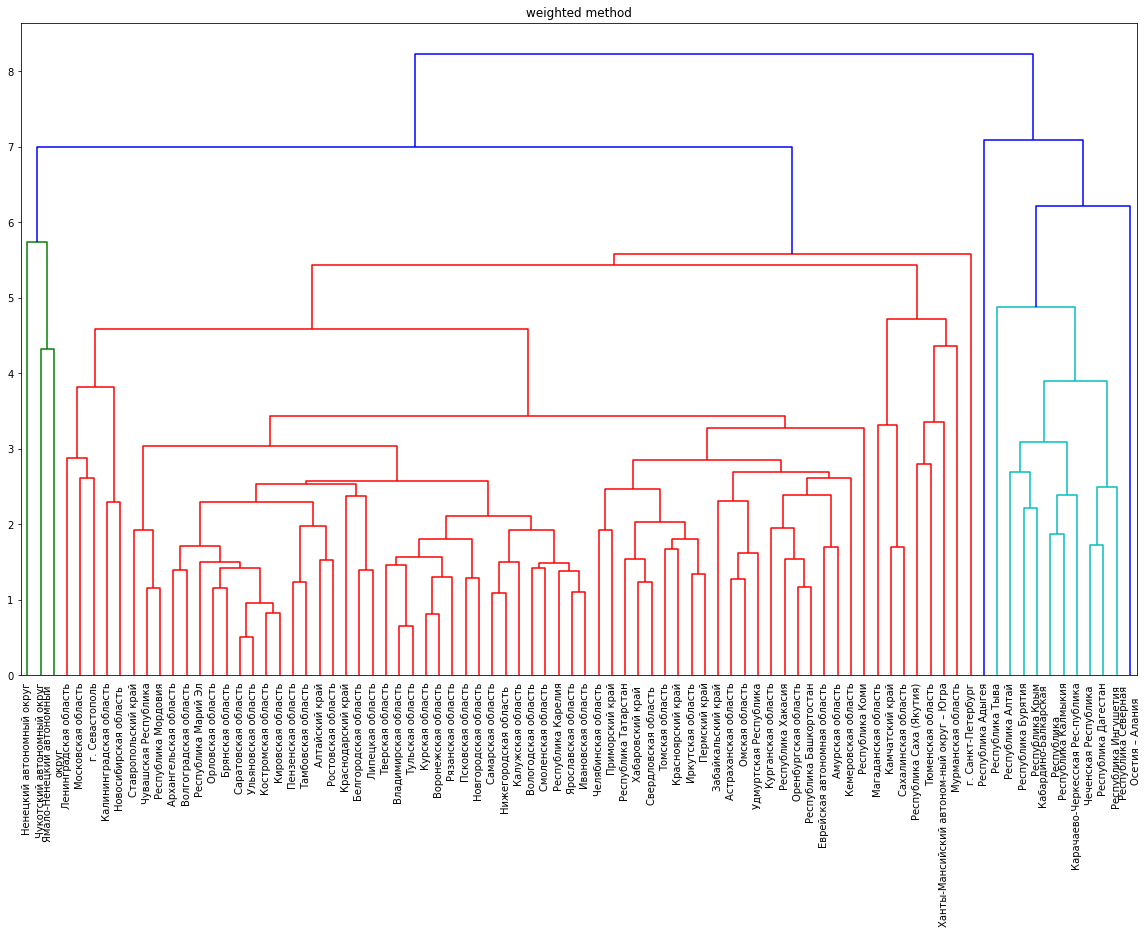

In [15]:
labels = ['г. Москва']
data.drop(labels=labels, inplace=True)
index = data.index
scaled = (data - data.mean(axis=0))/data.std()
scaled_data = pd.DataFrame(scaled, columns=columns, index=index) 
scaled_data.head()
methods = ['complete', 'ward', 'single', 'average', 'weighted']
for method in methods:
    Z = hierarchy.linkage(scaled_data, method=method, optimal_ordering=True)
    plt.figure(figsize=(20,12))
    hierarchy.dendrogram(Z, labels=scaled_data.index, leaf_font_size=10)
    plt.title('{} method'.format(method))


## 1.4. Кластеризация.

In [8]:
CLUSTER_METHODS = ["complete", "ward",'single', "kmeans", "weighted"]
N_CLUSTERS = {
    "complete" : 6,
    "ward"     : 7,
    "single" : 7,
    "kmeans"  : 7,
    "weighted" : 6,
}
#метод полных связей
complete = AgglomerativeClustering(n_clusters=N_CLUSTERS['complete'], linkage='complete')
complete.fit(scaled_data)
#метод варда
ward = AgglomerativeClustering(n_clusters=N_CLUSTERS['ward'], linkage='ward')
ward.fit(scaled_data);
#метод kmeans
kmeans = KMeans(n_clusters=N_CLUSTERS['kmeans'], random_state=36)
kmeans.fit(scaled_data);
#метод одиночных связей
single = AgglomerativeClustering(n_clusters=N_CLUSTERS['single'], linkage='single')
single.fit(scaled_data)
#метод невзвешенного попарного среднего
#average = AgglomerativeClustering(n_clusters=N_CLUSTERS['average'], linkage='average')
#average.fit(scaled_data)
#метод взвешенного попарного среднего
Z=scipy.cluster.hierarchy.weighted(scipy.spatial.distance.pdist(scaled_data))
weighted=scipy.cluster.hierarchy.fcluster(Z, 5.86, criterion='distance')
weighted
max(weighted)

6

In [7]:
import scipy

## 1.5. Работа с метками кластеров. Построение графиков средних значений.

In [9]:
#дополнение меток кластеров в исходный ДФ
scaled_data['complete'] = complete.labels_
scaled_data['ward'] = ward.labels_
scaled_data['kmeans'] = kmeans.labels_
scaled_data['single'] = single.labels_
scaled_data['weighted'] = weighted - 1


def mean_df(method, n_clust):
    mean_data = np.array([]).reshape(0, f_len+1)
    for n in range(n_clust):
        tmp = [] 
        for j in range(f_len):
            tmp.append(scaled_data[scaled_data[method] == n].iloc[:, j].mean())
            
        tmp.append(scaled_data[scaled_data[method] == n].shape[0])
        mean_data = np.vstack((mean_data, np.array(tmp).reshape(1, f_len+1)))

    return mean_data

columns = features + ['count']
means = {}
dfs = []
path = "means.xlsx" 
writer = pd.ExcelWriter(path, engine = 'xlsxwriter') 

for method, n in N_CLUSTERS.items():
    means[method] = pd.DataFrame(
        mean_df(method, n), 
        columns=columns, 
        index=["{}_{}".format(method, i) for i in range(n)]
    )


    means[method].to_excel(writer, sheet_name = '{} means'.format(method))
writer.save()

for method in CLUSTER_METHODS:
    print(means[method])


                  X1        X2        X3        X4        X5        X6  \
complete_0 -0.967580  2.268539 -0.359373  1.252442 -0.336625  0.109389   
complete_1 -0.029850 -0.473179 -0.374219 -0.450290 -0.431088  0.492352   
complete_2  0.675316 -0.185677  0.779508  0.097184  0.350353 -0.384586   
complete_3 -2.560035 -0.789083 -2.337731 -1.779078 -0.060298 -0.216207   
complete_4 -0.812327  0.513273 -0.607878  0.565556 -0.037077  0.058224   
complete_5 -0.377618  0.912254 -0.349691  1.235452  0.938197 -0.388307   

                  X7        X8        X9       X10  count  
complete_0  0.696958  0.377809  2.262161 -0.088313    8.0  
complete_1  0.294570 -0.439619 -0.296218 -0.191034   30.0  
complete_2 -0.199977  0.139652 -0.263920 -0.171274   35.0  
complete_3 -0.974997 -1.535774 -0.703212 -0.510669    4.0  
complete_4 -1.013730 -0.246345  1.187180  3.977224    4.0  
complete_5  0.135336  3.101686 -0.477354 -0.358527    4.0  
              X1        X2        X3        X4        X5     

## 1.6. Построение графиков средних.

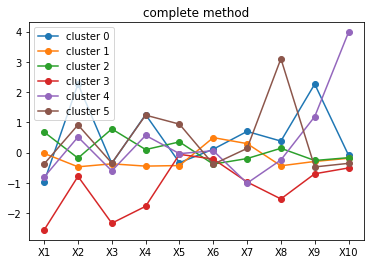

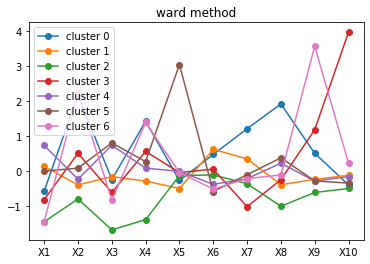

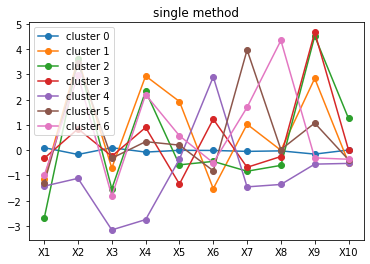

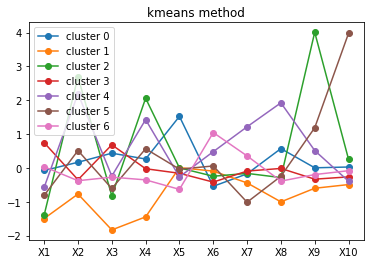

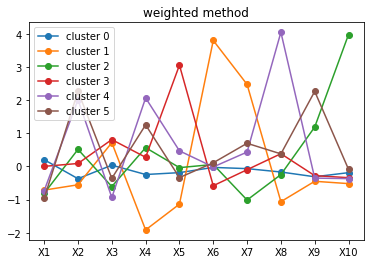

In [10]:
for method in CLUSTER_METHODS:
    # в cur_mean записывается элемент словаря means, соот-ветствующий ключу method (т.е. средние значения признаков в кластерых для метода method)
    cur_mean = means[method] 
    plt.figure(figsize=(6,4))
   #для каждого кластера из данного метода строим график
    for n in range(cur_mean.shape[0]): 
        plt.plot(features, cur_mean.iloc[n, :-1].values, marker='o', label='cluster {}'.format(n))
        plt.legend(loc = 'upper left') #легенда графика
    plt.title('{} method'.format(cur_mean.index[0][:-2])) #назва-ние 


## 1.7. Выгрузка элементов в кластерах.

In [11]:
cluster_dict = {}
path = "members.xlsx" 
writer = pd.ExcelWriter(path, engine = 'xlsxwriter') 

for method, n in N_CLUSTERS.items():
     #выводим заголовки методов
    print('{} method\n'.format(method)) 
    dfs = []  
     #для каждого кластера проходимся по объектам и запи-сываем их в словарь
    for i in range(n): 
        cluster_dict['{}_{}'.format(method, i)] = scaled_data[scaled_data[method]==i][features]
        
        #Записываем элементы кластеров в файл members. Файл создается в той же директории, где лежит ноутбук с кодом
        cluster_dict['{}_{}'.format(method, i)].to_excel(writer, sheet_name = '{}_{}'.format(method, i))
        
        #выводим на экран состав кластеров
        print ('Состав кластера {}: {}'
              .format(i, cluster_dict['{}_{}'.format(method, i)].index.values))      
    print ('\n')


complete method

Состав кластера 0: ['Камчатский край' 'Магаданская область' 'Мурманская область'
 'Ненецкий автономный округ' 'Республика Саха (Якутия)'
 'Сахалинская область' 'Чукотский автономный округ'
 'Ямало-Ненецкий автономный \nокруг']
Состав кластера 1: ['Алтайский край' 'Амурская область' 'Архангельская область'
 'Астраханская область' 'Волгоградская область'
 'Еврейская автономная область' 'Забайкальский край'
 'Кабардино-Балкарская \nРеспублика' 'Карачаево-Черкесская Рес-публика'
 'Курганская область' 'Омская область' 'Оренбургская область'
 'Пермский край' 'Приморский край' 'Республика Алтай'
 'Республика Башкортостан' 'Республика Бурятия' 'Республика Калмыкия'
 'Республика Коми' 'Республика Крым' 'Республика Марий Эл'
 'Республика Мордовия' 'Республика Северная \nОсетия – Алания'
 'Республика Хакасия' 'Ростовская область' 'Ставропольский край'
 'Томская область' 'Удмуртская Республика' 'Челябинская область'
 'Чувашская Республика']
Состав кластера 2: ['Белгородская област

## 1.8. Функционал качества разбиения.

In [12]:
def Q(method_num, mean_data_row):
    q = 0 
    for i in range(len(method_num)): 
        tmp=0
        for j, feature in zip(range(len(features)), features):
            tmp = tmp + (method_num.iloc[i, j] - mean_data_row[feature][0])**2 
            q = q + tmp
        return q

## 1.9. Таблица средних.

In [13]:
mean_data = pd.DataFrame()
for method in CLUSTER_METHODS:
    mean_data = mean_data.append(means[method])
mean_data

,X1,X2,X3,X4,X5,X6,X7,X8,X9,X10,count
complete_0,-0.967580,2.268539,-0.359373,1.252442,-0.336625,0.109389,0.696958,0.377809,2.262161,-0.088313,8.0
complete_1,-0.029850,-0.473179,-0.374219,-0.450290,-0.431088,0.492352,0.294570,-0.439619,-0.296218,-0.191034,30.0
complete_2,0.675316,-0.185677,0.779508,0.097184,0.350353,-0.384586,-0.199977,0.139652,-0.263920,-0.171274,35.0
complete_3,-2.560035,-0.789083,-2.337731,-1.779078,-0.060298,-0.216207,-0.974997,-1.535774,-0.703212,-0.510669,4.0
complete_4,-0.812327,0.513273,-0.607878,0.565556,-0.037077,0.058224,-1.013730,-0.246345,1.187180,3.977224,4.0
complete_5,-0.377618,0.912254,-0.349691,1.235452,0.938197,-0.388307,0.135336,3.101686,-0.477354,-0.358527,4.0
ward_0,-0.572793,2.193070,-0.239962,1.428006,-0.264641,0.479948,1.215544,1.923785,0.513726,-0.392793,6.0
ward_1,0.139893,-0.392792,-0.157127,-0.282331,-0.496694,0.623366,0.354821,-0.387728,-0.233704,-0.117685,24.0
ward_2,-1.449309,-0.792471,-1.680645,-1.384908,-0.125316,-0.105504,-0.357858,-1.002619,-0.609048,-0.494926,10.0
ward_3,-0.812327,0.513273,-0.607878,0.565556,-0.037077,0.058224,-1.013730,-0.246345,1.187180,3.977224,4.0


## 1.10. Качество разбиения по каждому методу.

In [14]:
#создаем пустой словарь, в который будем записывать значения функционалов ошибки для каждого метода
Q_dict = {}
#k - номер строки в датафрейме mean_data (выведен выше)
k = 0
for method, n in N_CLUSTERS.items():
    #в переменной tmp суммируем функционал ошибки для каждого кластера в рамках одного метода
    tmp = 0
    #для каждого кластера (их всего n) в данном методе method выполняются действия в теле цикла
    for i in range(n):
        #в переменную tmp прибавляется значение Q (функция, объявленная выше) для текущего номера кластера i (изменяет-ся от 0 до n-1)
        #В Q передаем в качестве первого аргумента дата-фрейм, содержащий члены текущего кластера
        #В качестве второго аргумента - строку из mean_data с индексом k (там записаны средние значения для данного кла-стера i)
        tmp += Q(cluster_dict['{}_{}'.format(method, i)], pd.DataFrame(mean_data.iloc[k]).T)
        #увеличиваем k на 1 (чтобы перейти к следующей строке mean_data)
        k += 1   
    #после того, как прошли по всем кластерам в рамках ме-тода method и просуммировали функционалы ошибки в пере-менной tmp, запишем результирующую сумму в словарь
    Q_dict['Q_{}'.format(method)] = round(tmp, 3)


Q_dict 


{'Q_complete': 196.947,
 'Q_ward': 228.958,
 'Q_single': 15.576,
 'Q_kmeans': 263.267,
 'Q_weighted': 116.992}